Running sentiment analysis...
TASK 2: SENTIMENT ANALYSIS
❌ Error loading data: Could not find review data
Creating sample data for testing...
Created sample data with 1200 reviews

🔍 Starting sentiment analysis with DistilBERT...


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Device set to use cpu


✅ DistilBERT model loaded successfully
  Processing batch 1/13...
  Processing batch 2/13...
  Processing batch 3/13...
  Processing batch 4/13...
  Processing batch 5/13...
  Processing batch 6/13...
  Processing batch 7/13...
  Processing batch 8/13...
  Processing batch 9/13...
  Processing batch 10/13...
  Processing batch 11/13...
  Processing batch 12/13...
✅ Sentiment analysis complete!
   Positive reviews: 480
   Negative reviews: 720
   Neutral reviews: 0

📊 Aggregating sentiment by bank and rating...
✅ Aggregation complete

💾 Saving results...
✅ Reviews with sentiment saved to: data/outputs/reviews_with_sentiment.csv
✅ Summary saved to: data/outputs/sentiment_summary.json

📈 KEY INSIGHTS:
----------------------------------------

Commercial Bank of Ethiopia:
  Average Rating: 2.80 stars
  Positive sentiment: 40.0%
  Negative sentiment: 60.0%
  Total reviews: 400

Bank of Abyssinia:
  Average Rating: 2.40 stars
  Positive sentiment: 0.0%
  Negative sentiment: 100.0%
  Total re

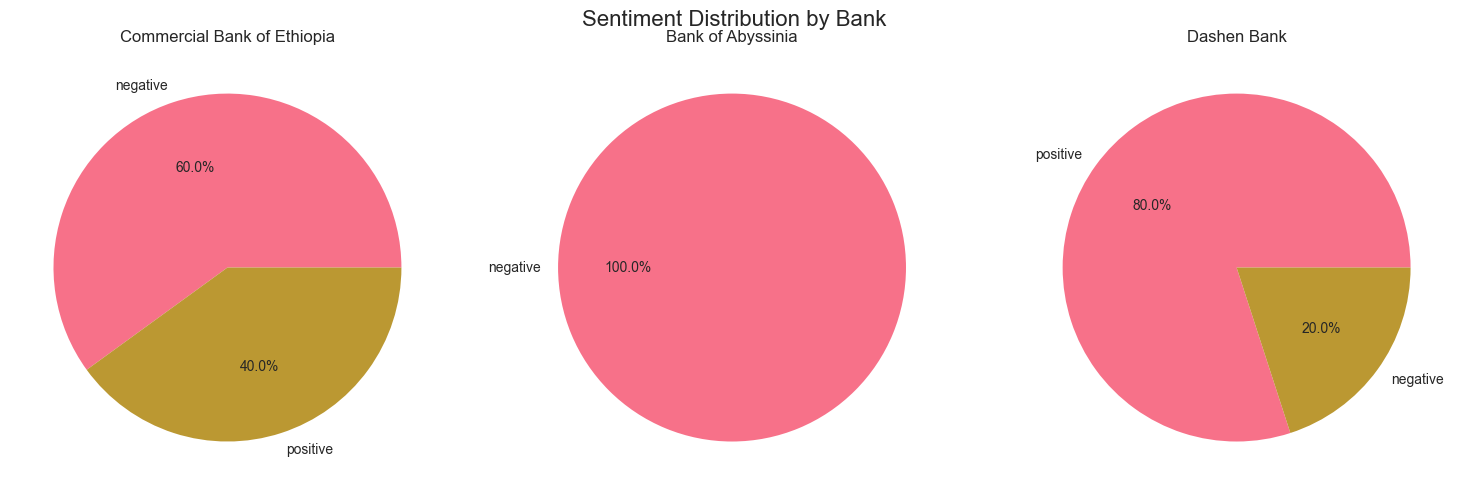

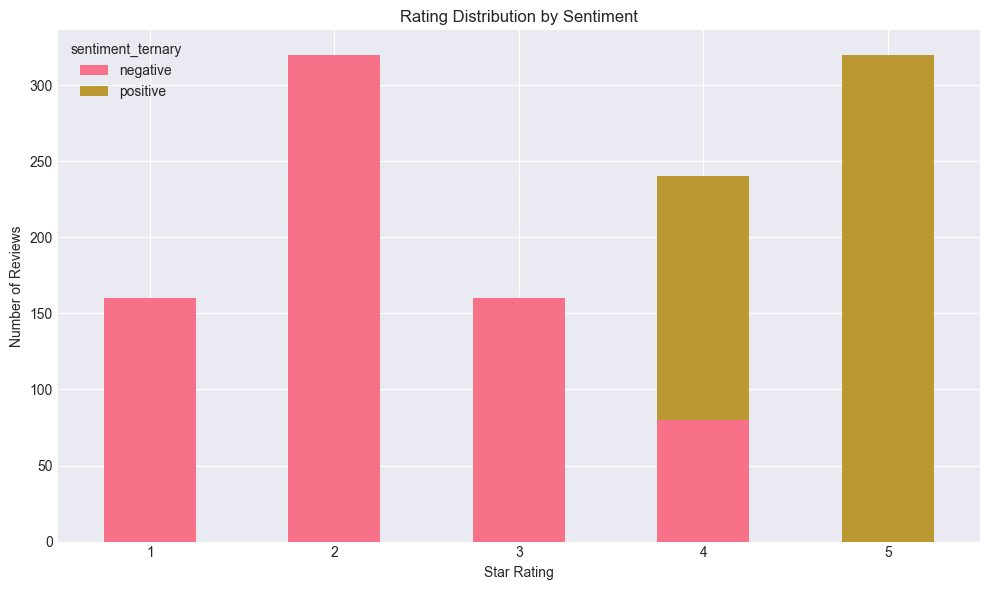

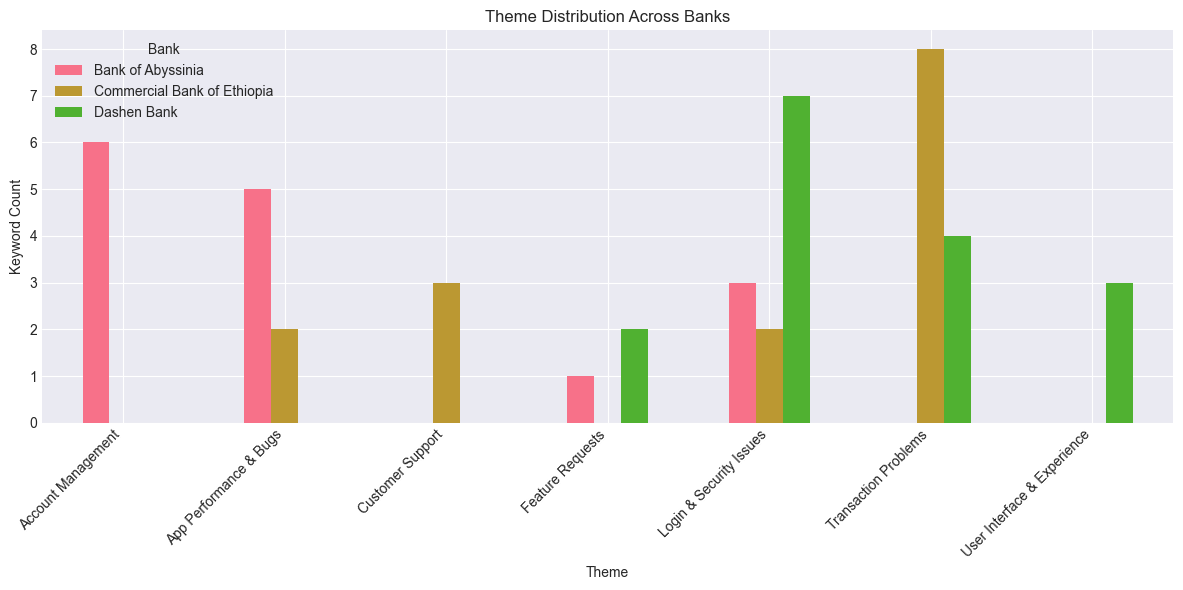

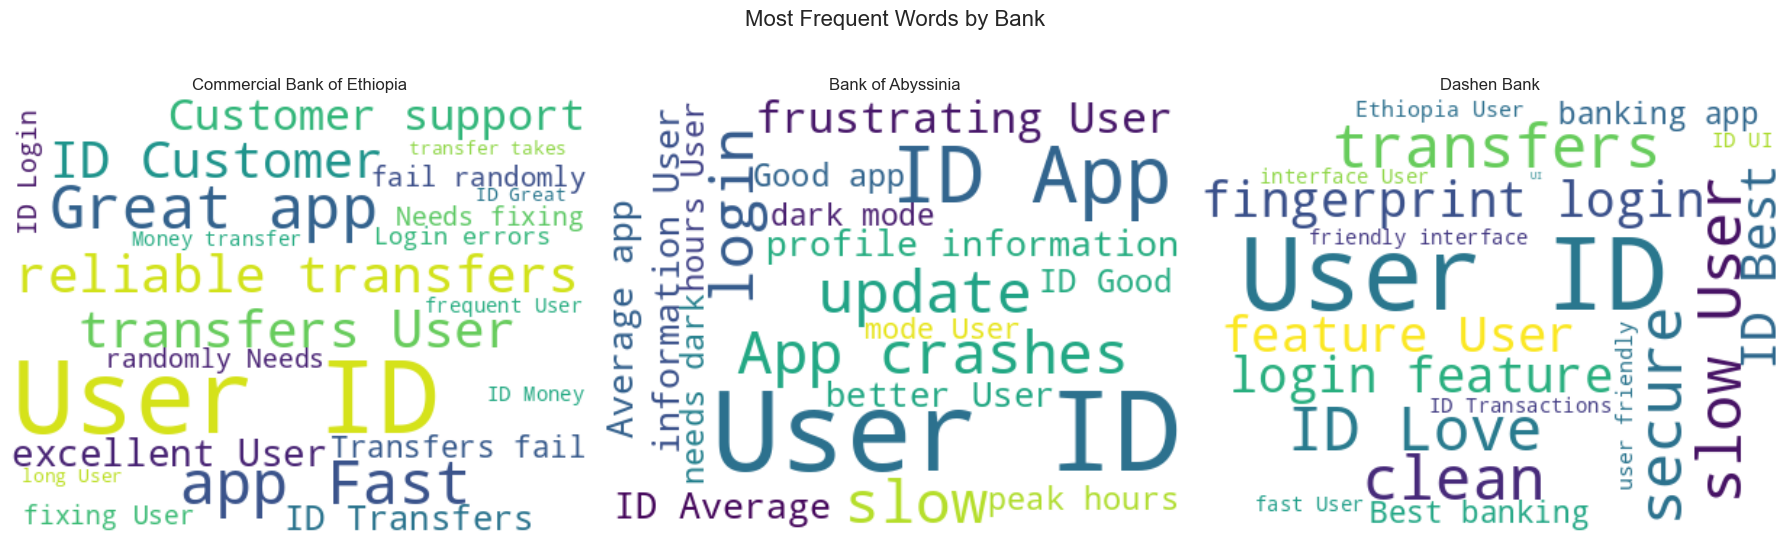


✅ Visualizations saved to data/outputs/


In [ ]:
# Save as: notebooks/task2_analysis.ipynb
"""
# Task 2: Sentiment and Thematic Analysis Notebook

This notebook contains exploratory analysis for Task 2.
"""

# First, run the sentiment analysis
print("Running sentiment analysis...")
%run ../src/analysis/task2_sentiment.py

print("\n" + "="*60)
print("Now running thematic analysis...")
%run ../src/analysis/task2_themes.py

print("\n" + "="*60)
print("Analysis complete! Creating visualizations...")

# Now create some visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import json

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('../data/outputs/reviews_with_sentiment.csv')

# 1. Sentiment distribution by bank
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Sentiment Distribution by Bank', fontsize=16)

for idx, bank in enumerate(df['bank'].unique()):
    bank_df = df[df['bank'] == bank]
    sentiment_counts = bank_df['sentiment_ternary'].value_counts()
    
    axes[idx].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
    axes[idx].set_title(bank)

plt.tight_layout()
plt.savefig('../data/outputs/sentiment_by_bank.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Rating vs Sentiment
fig, ax = plt.subplots(figsize=(10, 6))
rating_sentiment = df.groupby(['rating', 'sentiment_ternary']).size().unstack()
rating_sentiment.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Rating Distribution by Sentiment')
ax.set_xlabel('Star Rating')
ax.set_ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../data/outputs/rating_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Load thematic analysis results
with open('../data/outputs/thematic_analysis.json', 'r') as f:
    themes_data = json.load(f)

# Create theme comparison chart
fig, ax = plt.subplots(figsize=(12, 6))

theme_data = []
for bank, data in themes_data.items():
    for theme, count in data['theme_distribution'].items():
        if theme != 'Other':
            theme_data.append({
                'Bank': bank,
                'Theme': theme,
                'Count': count
            })

theme_df = pd.DataFrame(theme_data)

# Pivot for grouped bar chart
pivot_df = theme_df.pivot(index='Theme', columns='Bank', values='Count').fillna(0)

pivot_df.plot(kind='bar', ax=ax)
ax.set_title('Theme Distribution Across Banks')
ax.set_xlabel('Theme')
ax.set_ylabel('Keyword Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../data/outputs/theme_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Word Cloud for each bank
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Most Frequent Words by Bank', fontsize=16)

for idx, bank in enumerate(df['bank'].unique()):
    bank_reviews = ' '.join(df[df['bank'] == bank]['review'].astype(str))
    
    wordcloud = WordCloud(
        width=400,
        height=300,
        background_color='white',
        max_words=50
    ).generate(bank_reviews)
    
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis('off')
    axes[idx].set_title(bank)

plt.tight_layout()
plt.savefig('../data/outputs/wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualizations saved to data/outputs/")